In [1]:
#Libraries for data visualization and manipulation
import pandas as pd                                  #for data cell manipulation
import numpy as np                                   #for numerical analysis
import seaborn as sns                                #for data visualization
import matplotlib.pyplot as plt                      #for data plotting
%matplotlib inline

#Libararies for ML
from sklearn.model_selection import train_test_split #To split data into training and testing sets
from sklearn.naive_bayes import GaussianNB           #Classifier
from sklearn.metrics import confusion_matrix ,accuracy_score        #Confusion Matrix
from sklearn.metrics import classification_report    #Classification Report

from sklearn.metrics import roc_auc_score as roc
from sklearn.model_selection import train_test_split, cross_validate

from pandas import Series, DataFrame
from termcolor import colored as cl # text customization

from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler

import warnings                                      #To manage warnings
warnings.filterwarnings("ignore")                    #Supress warnings

In [2]:
df = pd.read_csv("creditcard.csv")

In [3]:
df.head(3)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
legit = df[df['Class']==0]
fraud = df[df['Class']==1]

In [6]:
fraud.head(3)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
541,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
623,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
4920,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1


In [7]:
legit.head(3)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0


<AxesSubplot:xlabel='Class', ylabel='count'>

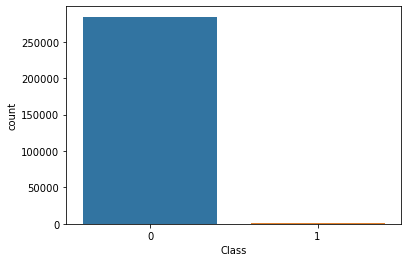

In [8]:
sns.countplot(df['Class']) 

In [9]:
#Percentage of fraudulent transactions

Total_transactions = len(df)
normal = len(df[df.Class == 0])
fraudulent = len(df[df.Class == 1])
fraud_percentage = round(fraudulent/normal*100, 2)
print(cl('Total number of Trnsactions are {}'.format(Total_transactions), attrs = ['bold']))
print(cl('Number of Normal Transactions are {}'.format(normal), attrs = ['bold']))
print(cl('Number of fraudulent Transactions are {}'.format(fraudulent), attrs = ['bold']))
print(cl('Percentage of fraud Transactions is {}'.format(fraud_percentage), attrs = ['bold']))

Total number of Trnsactions are 284807
Number of Normal Transactions are 284315
Number of fraudulent Transactions are 492
Percentage of fraud Transactions is 0.17


In [10]:
df.describe().round(decimals=2)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,...,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00
mean,94813.86,0.00,0.00,-0.00,0.00,-0.00,0.00,-0.00,-0.00,-0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,-0.00,-0.00,88.35,0.00
std,47488.15,1.96,1.65,1.52,1.42,1.38,1.33,1.24,1.19,1.10,...,0.73,0.73,0.62,0.61,0.52,0.48,0.40,0.33,250.12,0.04
min,0.00,-56.41,-72.72,-48.33,-5.68,-113.74,-26.16,-43.56,-73.22,-13.43,...,-34.83,-10.93,-44.81,-2.84,-10.30,-2.60,-22.57,-15.43,0.00,0.00
25%,54201.50,-0.92,-0.60,-0.89,-0.85,-0.69,-0.77,-0.55,-0.21,-0.64,...,-0.23,-0.54,-0.16,-0.35,-0.32,-0.33,-0.07,-0.05,5.60,0.00
50%,84692.00,0.02,0.07,0.18,-0.02,-0.05,-0.27,0.04,0.02,-0.05,...,-0.03,0.01,-0.01,0.04,0.02,-0.05,0.00,0.01,22.00,0.00
75%,139320.50,1.32,0.80,1.03,0.74,0.61,0.40,0.57,0.33,0.60,...,0.19,0.53,0.15,0.44,0.35,0.24,0.09,0.08,77.16,0.00
max,172792.00,2.45,22.06,9.38,16.88,34.80,73.30,120.59,20.01,15.59,...,27.20,10.50,22.53,4.58,7.52,3.52,31.61,33.85,25691.16,1.00


In [11]:
print("Column names : " , list(df))
print("Total columns : " , len(list(df)))

Column names :  ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class']
Total columns :  31


In [12]:
n_legit = len(df[df["Class"] == 0])
n_fraud = len(df[df["Class"] == 1])

Number of legitimacy transactions :  284315
Number of fraudulent transactions :  492


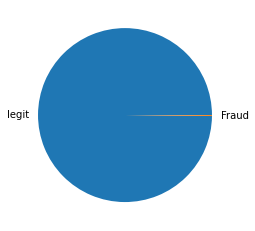

In [13]:
print("Number of legitimacy transactions : " , n_legit)
print("Number of fraudulent transactions : " , n_fraud)

plt.pie([n_legit, n_fraud] , labels=['legit', 'Fraud'], radius=1)
plt.show()

In [14]:
min(df.Amount),max(df.Amount)

(0.0, 25691.16)

In [15]:
#Dataset unbalanced

<AxesSubplot:>

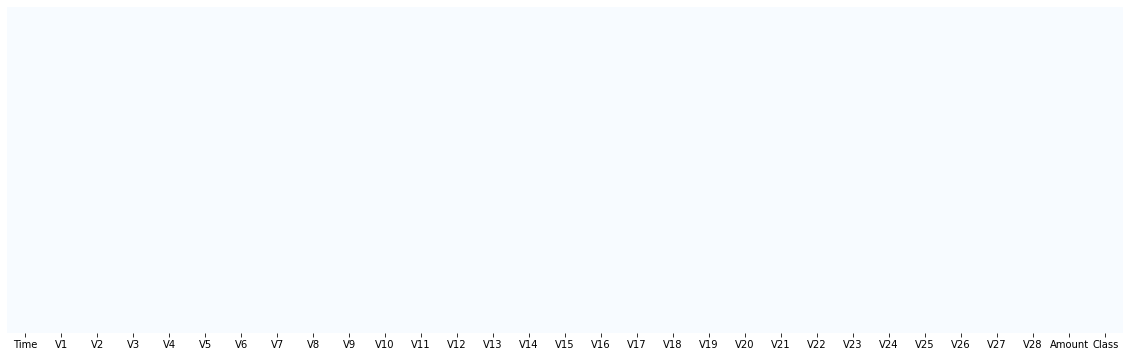

In [16]:
#check for null values
plt.figure(figsize=(20,6))
sns.heatmap(df.isnull(), yticklabels = False, cbar = False, cmap="Blues")

<AxesSubplot:>

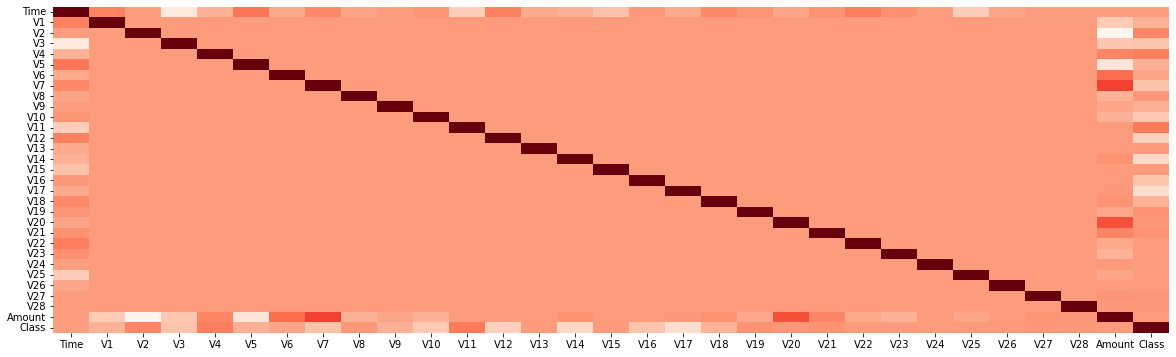

In [17]:
#Check for correlation
plt.figure(figsize=(20,6)) 
sns.heatmap(df.corr(), annot=False, cmap='Reds', cbar=False) 

In [18]:
#Data not correlated, because parameters were derived from PCA

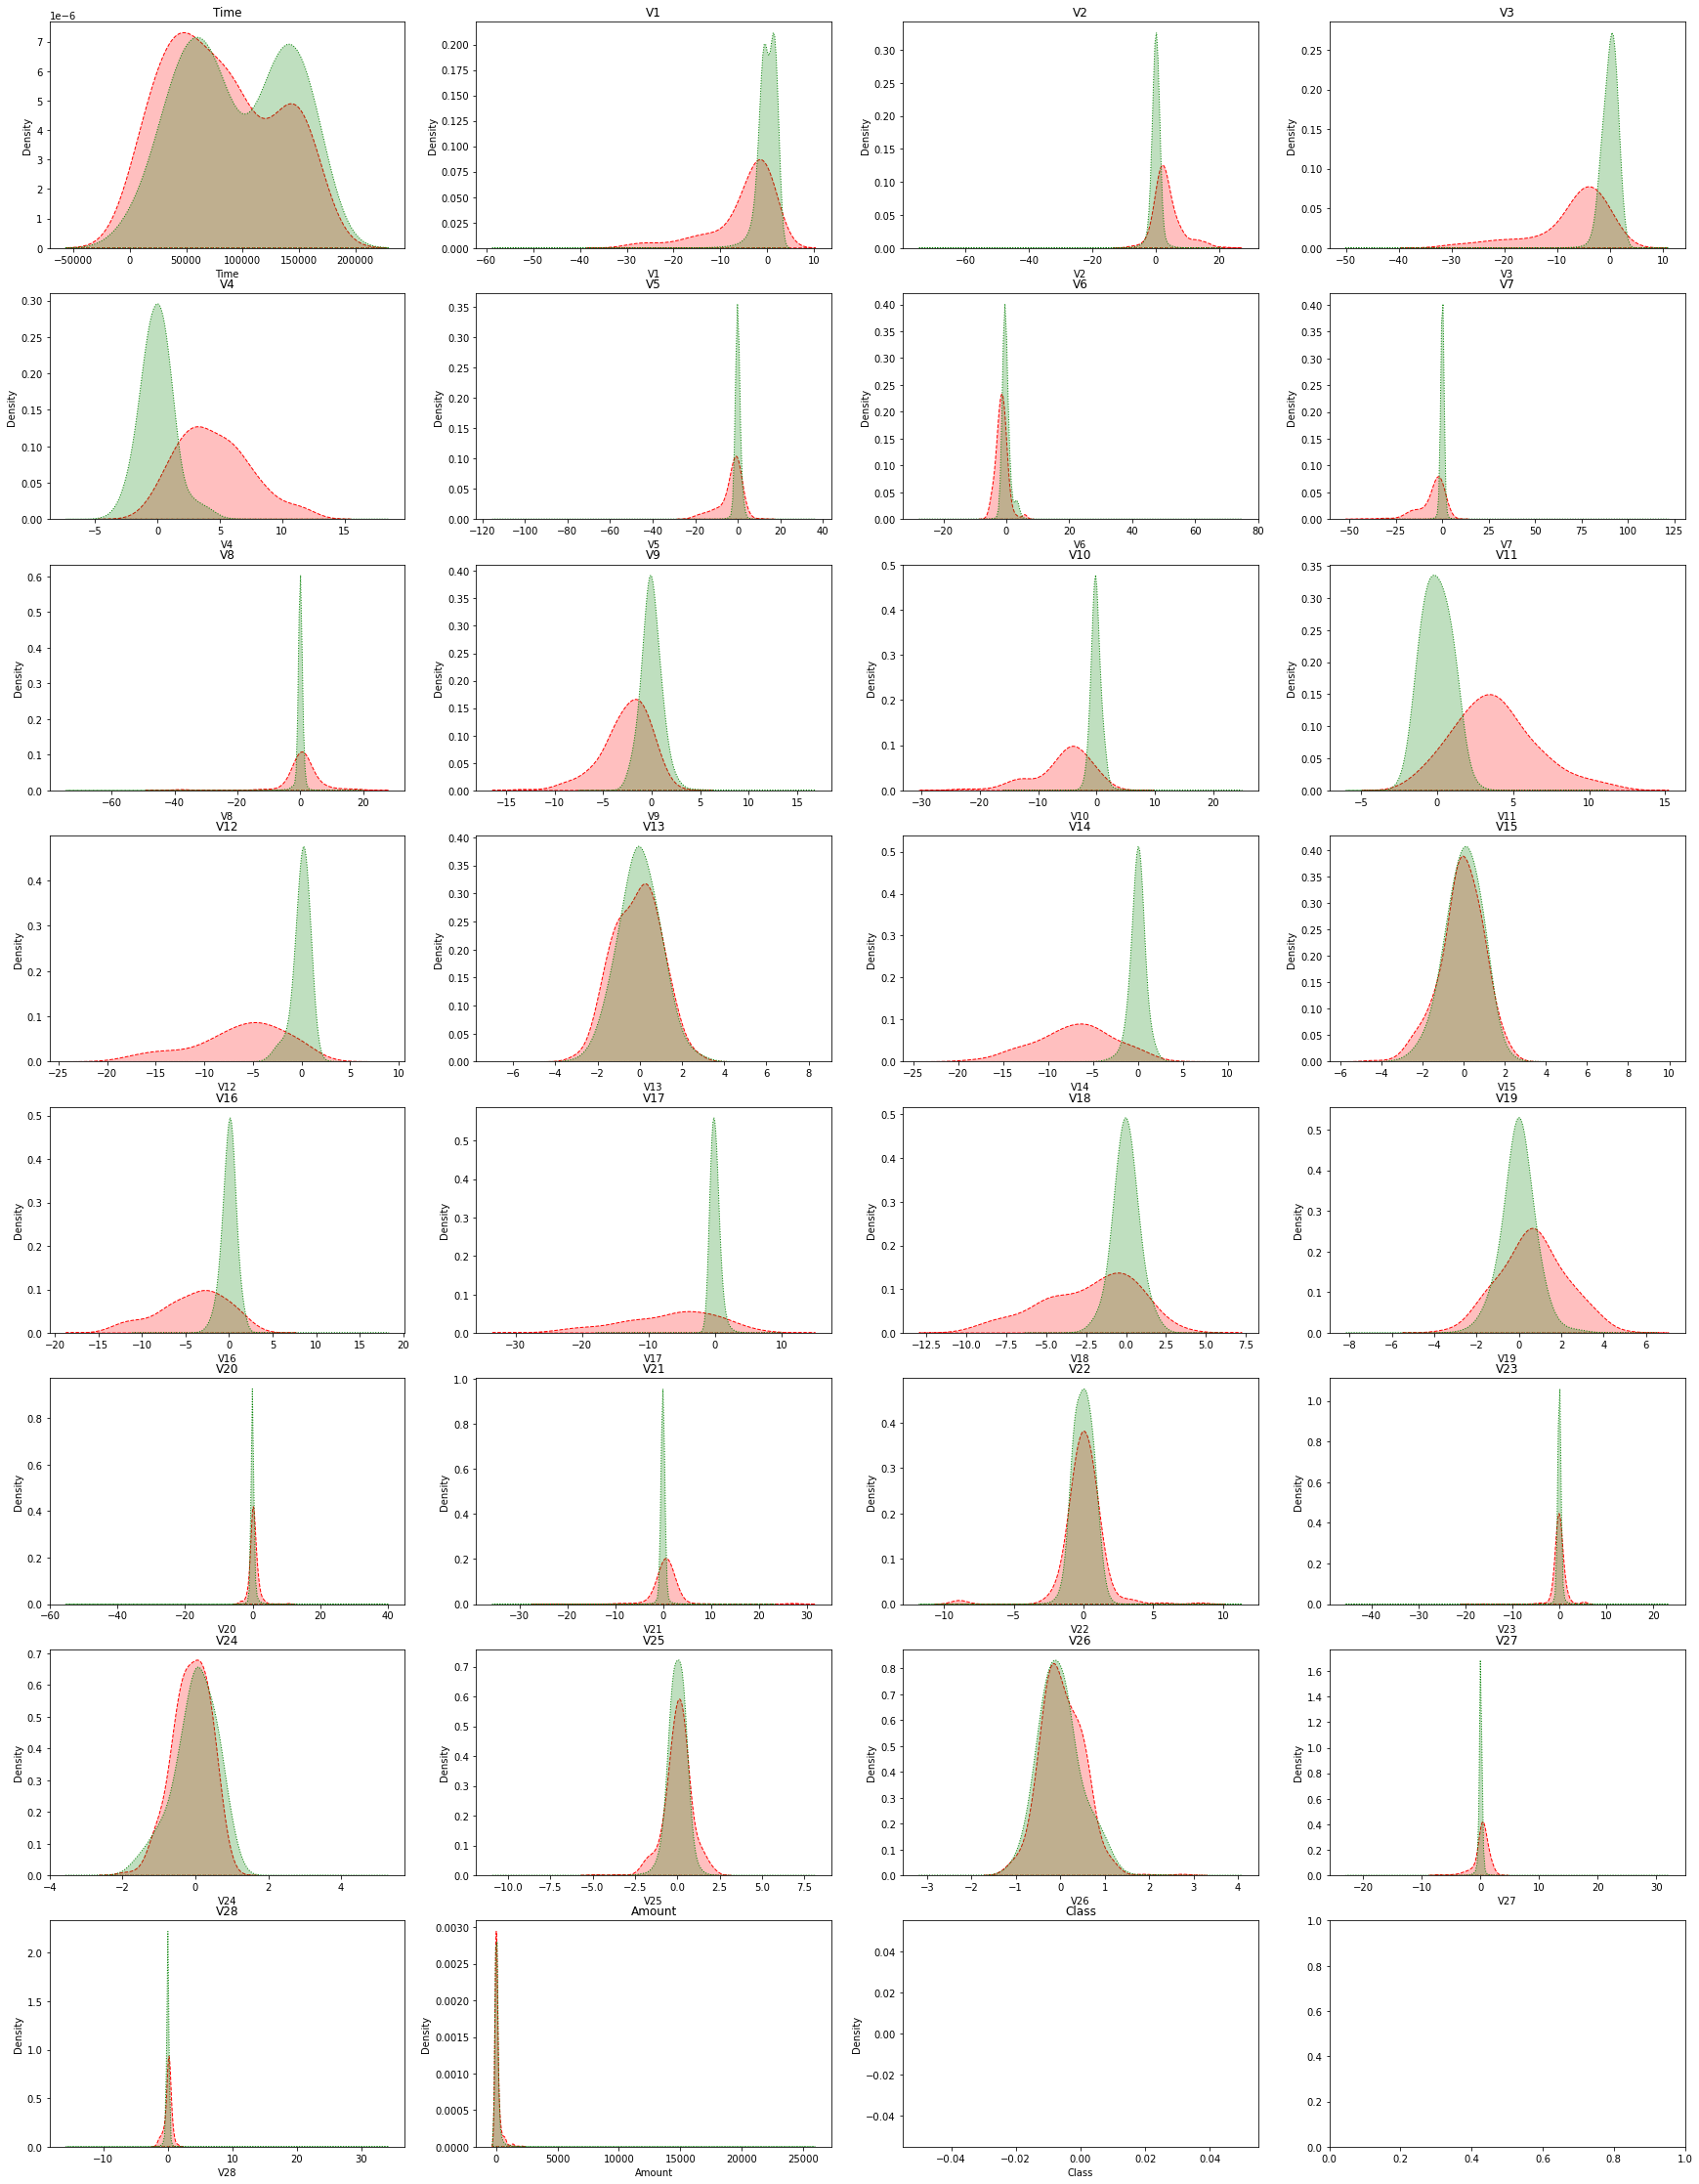

In [19]:
#Visualize column contents by fraud/legit to see if column adds value
columns = df.columns.values
counter = 1
fig, ax = plt.subplots(8,4,figsize=(30,40))
for column in columns:    
    plt.subplot(8,4,counter)
    sns.kdeplot(fraud[column], bw = 0.4, label = "Fraudulent", shade=True, color="r", linestyle="--")
    sns.kdeplot(legit[column], bw = 0.4, label = "Non Fraudulent", shade=True, color= "g", linestyle=":")
    plt.title(column, fontsize=12)
    counter=counter + 1
plt.show();

In [20]:
# Create inputs and outputs
X = df.drop(['Class'],axis=1)
y = df.Class

In [21]:
#choose inputs to consider based on difference plot
X = X[['Time','V4','V11','V12','V14','V16','V17']]

In [22]:
#Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) #20% for testing

In [23]:
NB_classifier = GaussianNB()
NB_classifier.fit(X_train, y_train)

GaussianNB()

In [24]:
cv_results = cross_validate(NB_classifier, X_train, y_train, cv=10, scoring='recall', 
                            return_train_score = True, return_estimator = True)

In [25]:
print("Training scores from each fold : ", cv_results['train_score'])
# iteration with maximum train_score is selected for training model
max_score_index = np.argmax(cv_results['train_score'])
best_estimator = cv_results['estimator'][max_score_index]

Training scores from each fold :  [0.72117962 0.71774194 0.72580645 0.7311828  0.72849462 0.72117962
 0.72117962 0.73726542 0.73458445 0.72922252]


<AxesSubplot:>

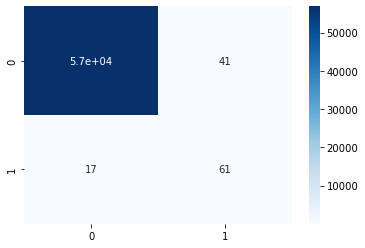

In [26]:
y_predict = NB_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_predict)
sns.heatmap(cm, annot=True, cmap='Blues')

In [27]:
def display_results(estimator, x, y):
    predicted = estimator.predict(x)
    report = classification_report(y, predicted)
    accuracy = accuracy_score(y, predicted)
    print(report)
    print("Accuracy = ", accuracy)

In [28]:
display_results(best_estimator, X_train, y_train)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227431
           1       0.76      0.72      0.74       414

    accuracy                           1.00    227845
   macro avg       0.88      0.86      0.87    227845
weighted avg       1.00      1.00      1.00    227845

Accuracy =  0.9990827097368825


In [29]:
display_results(best_estimator, X_test, y_test)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56884
           1       0.60      0.78      0.68        78

    accuracy                           1.00     56962
   macro avg       0.80      0.89      0.84     56962
weighted avg       1.00      1.00      1.00     56962

Accuracy =  0.9989817773252344
